In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scienceplots
import os
import re
mpl.rcParams.update(mpl.rcParamsDefault)

# plt.style.use(['science', 'ieee'])

In [10]:
def match_directories(base_directory):
    pattern = re.compile(r"^(Id-V(?:d|g))_T=(\d+)_d=(\S+)$")
    data_dict = {}
    
    for path, folders, files in os.walk(base_directory):
        for folder_name in folders:
                if folder_name == "geometrical_parameters" or folder_name == "plots":
                    continue
                match = pattern.match(folder_name)
                if match:
                    voltage_type, temperature, doping = match.groups()
                    key = (voltage_type, doping)
                    if key not in data_dict:
                        data_dict[key] = []
                    data_dict[key].append(folder_name)

    return data_dict

In [11]:
def plot_datasets(files_dict, voltage_type, doping, log_scale: False):
    color_map = {
        20: "green",
        300: "blue"
    }

    plt.figure(figsize=(10, 6))
    for fileName, data_dict in files_dict.items():
        dimensions = fileName.split("_")[0]
        voltage_condition = fileName.split("_")[2].replace(".txt", "")
        for temperature, data_list in data_dict.items():
            # temperature = float(temperature.split("=")[1].replace(".txt", ""))
            for i, data in enumerate(data_list):
                plt.plot(
                    data["Voltage (V)"], data["Current (A)"],
                    marker="o",
                    color=color_map.get(temperature, "pink"),  # Default to pink if dimension is not in color_map
                    label=  f"Temperature={temperature}K "
                            f"doping={doping}cm^-3"
                )
        plt.title(f"{voltage_type} Characteristics for {voltage_condition} and dimensions of {dimensions}")
        plt.xlabel("Voltage (V)")
        if log_scale == True:
            plt.ylabel("Current (A) (Log scale)")
        else:
            plt.ylabel("Current (A)")
        # Uncomment the next line if you want a logarithmic Y-axis
        if log_scale == True:    
            plt.yscale("log", base=10)
        plt.legend()
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)

        base_directory = f"{voltage_type}_{dimensions}_{doping}"
        if log_scale == True:
            save_directory  = f"plots/temperature/log_scale/{base_directory}"
        else:      
            save_directory  = f"plots/temperature/natural_scale/{base_directory}"
        os.makedirs(save_directory, exist_ok=True)
        file_name = f"{voltage_condition}.png"
        file_path = os.path.join(save_directory, file_name)
        plt.savefig(file_path, format="png", dpi=300)

        plt.show()

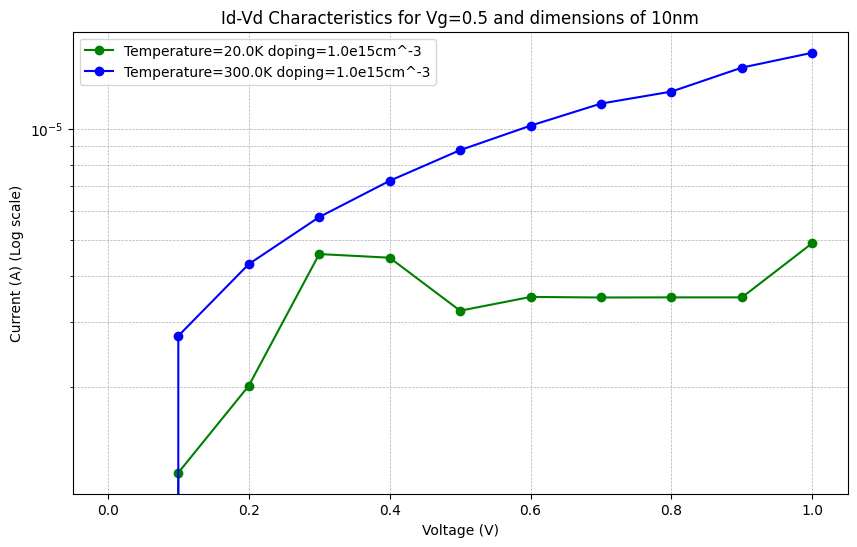

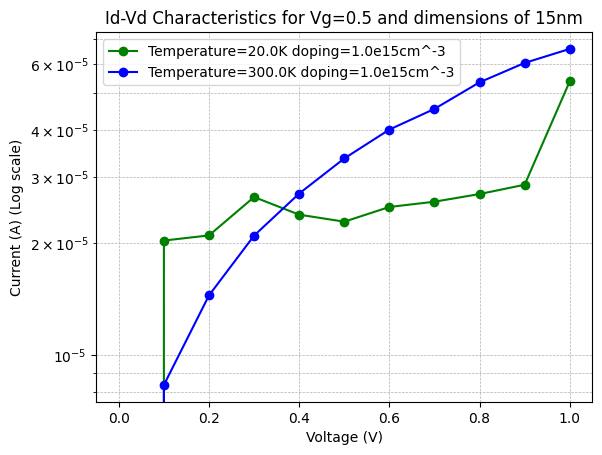

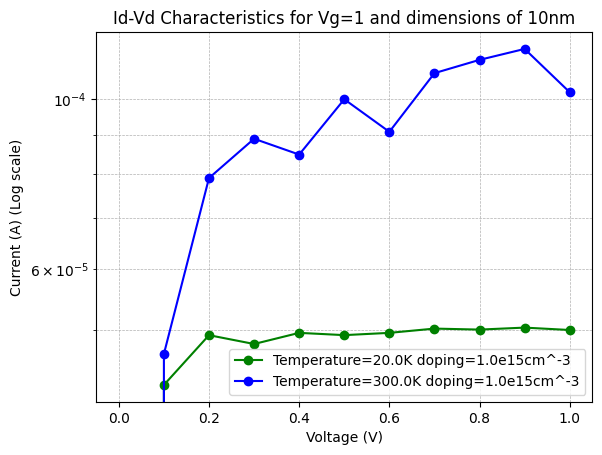

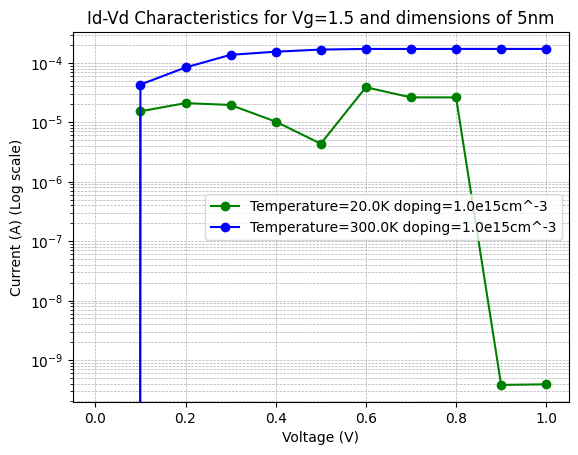

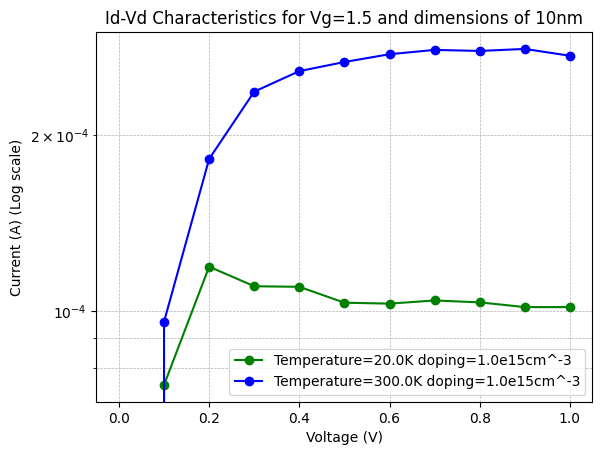

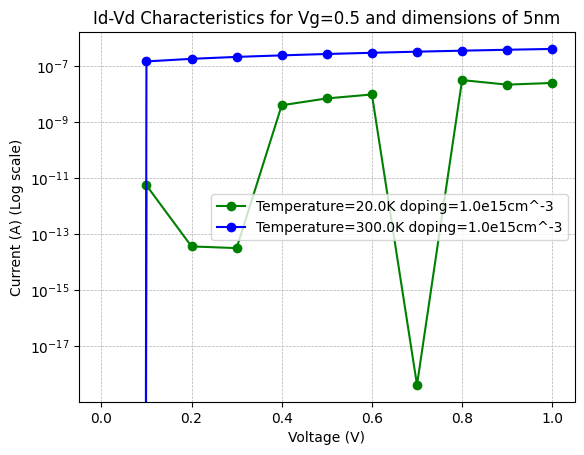

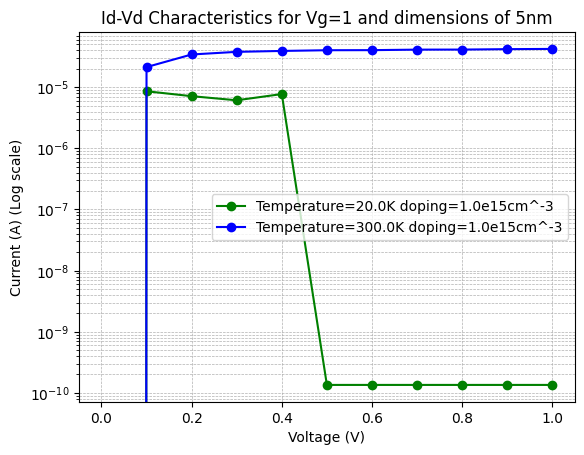

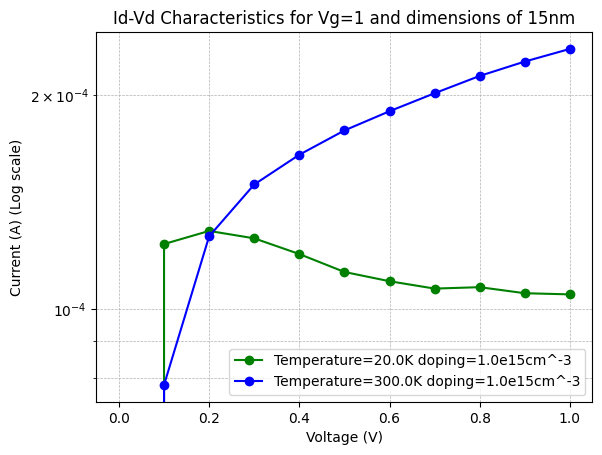

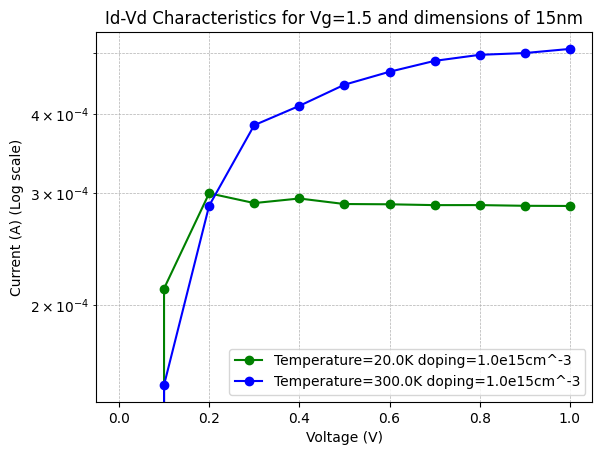

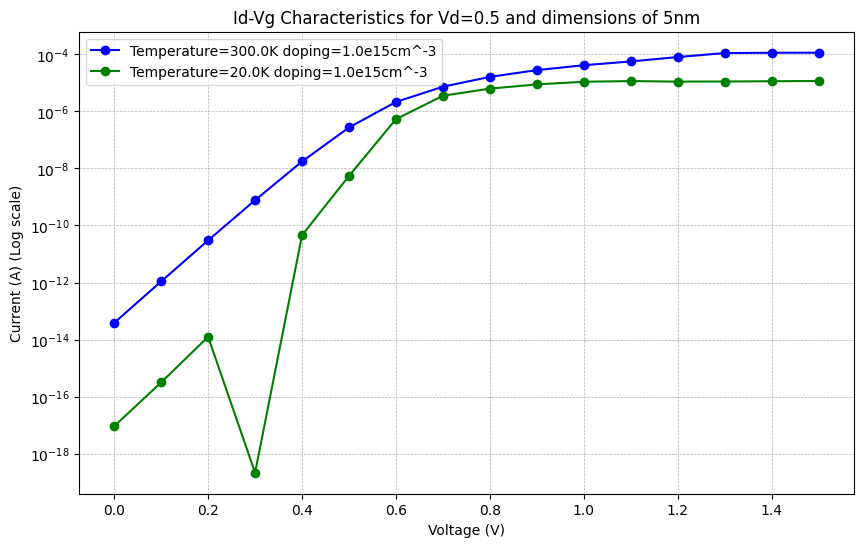

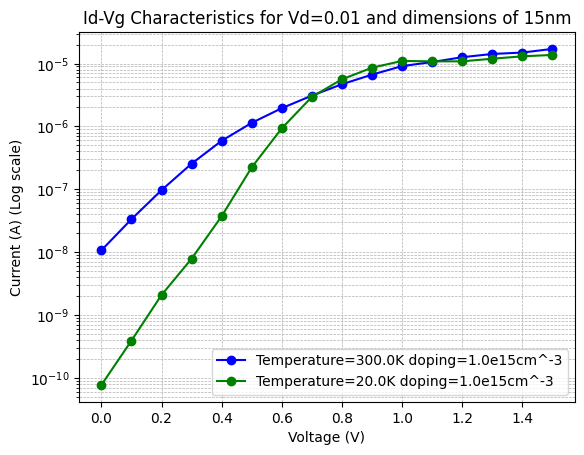

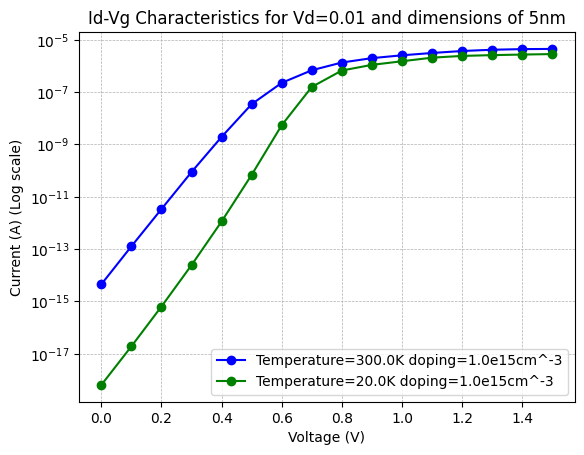

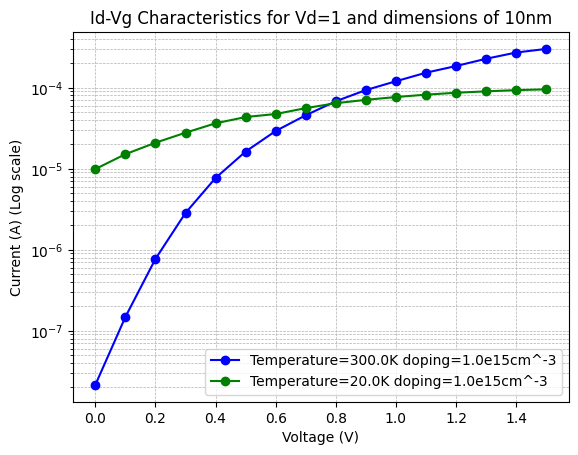

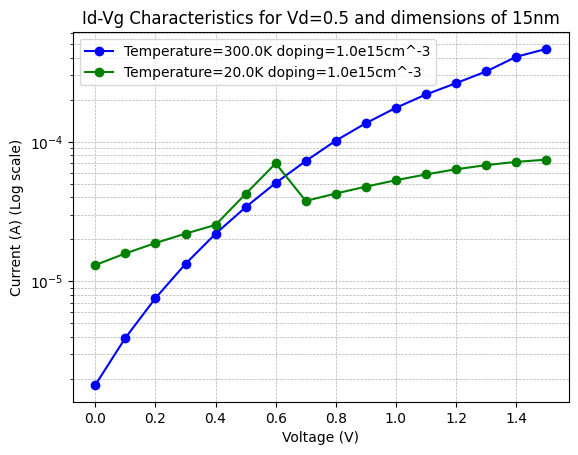

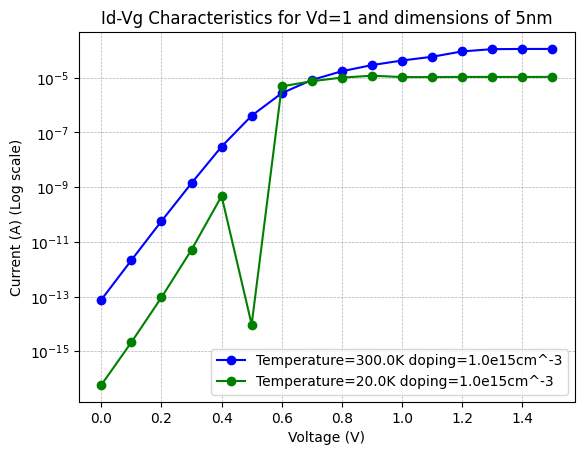

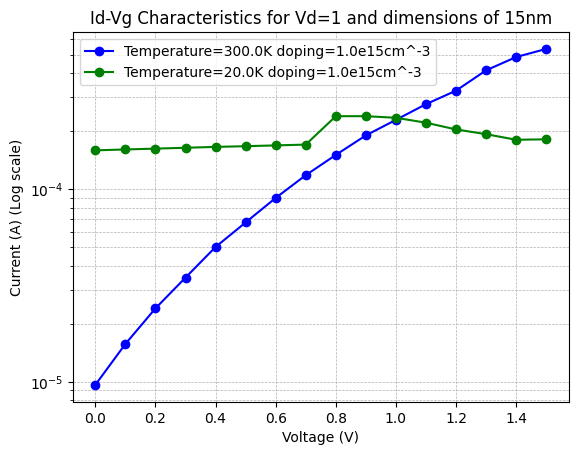

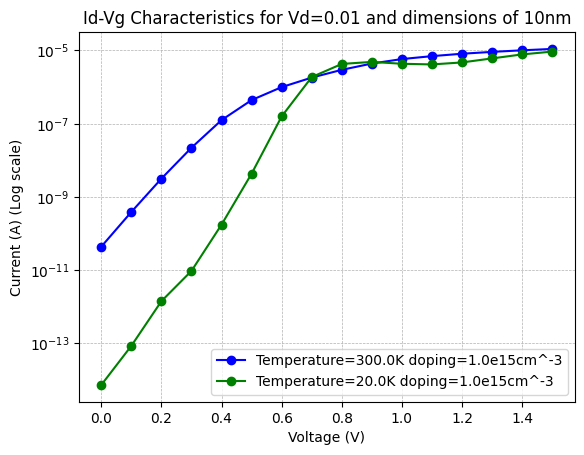

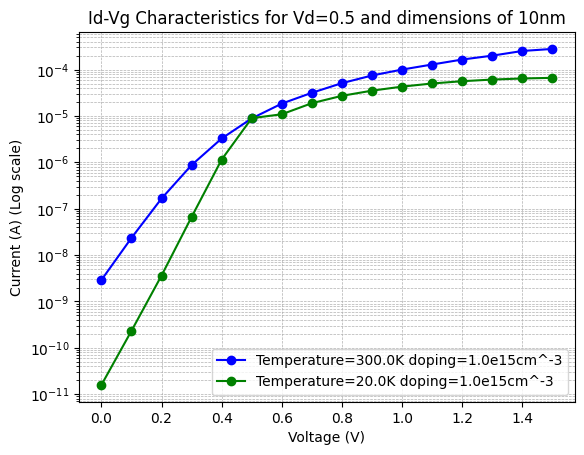

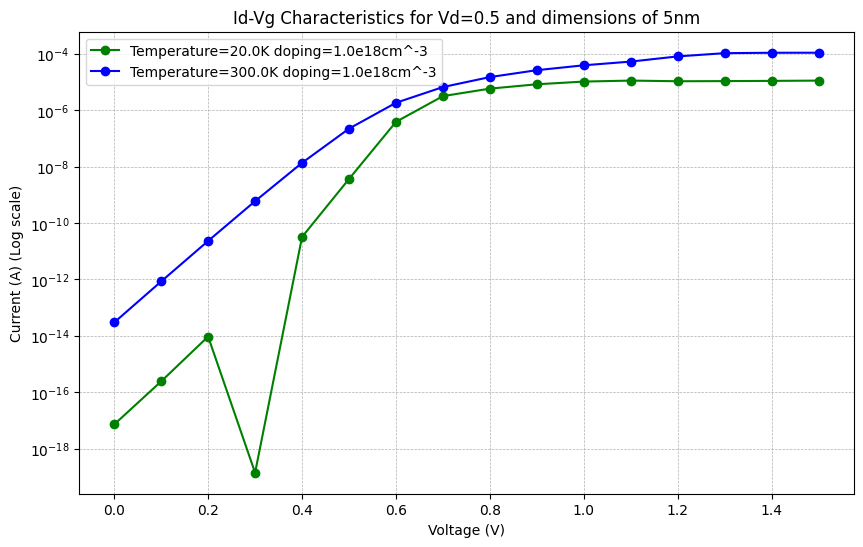

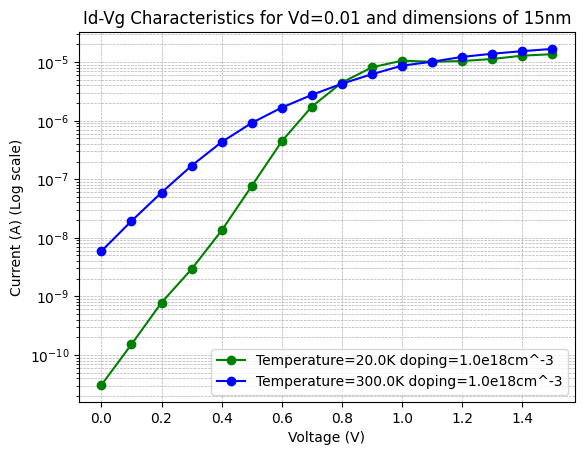

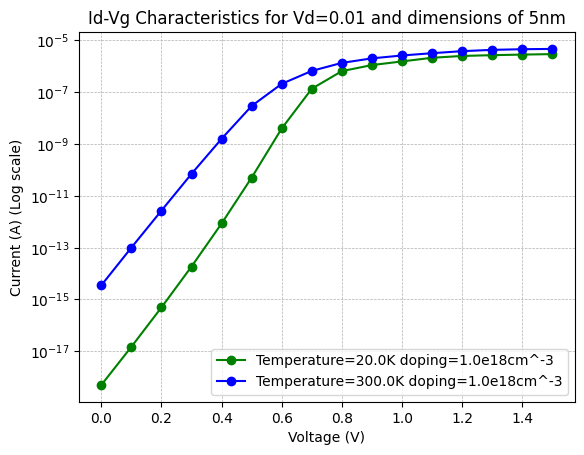

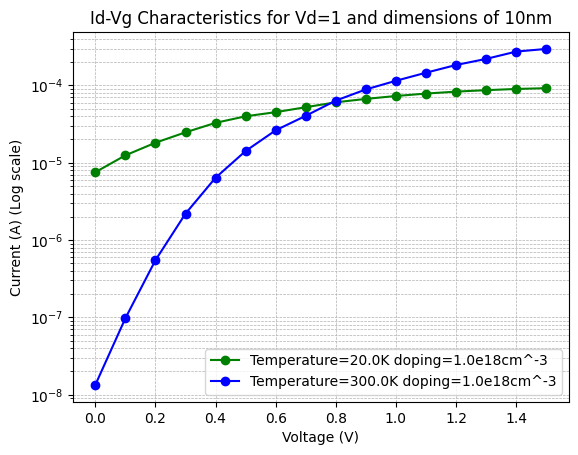

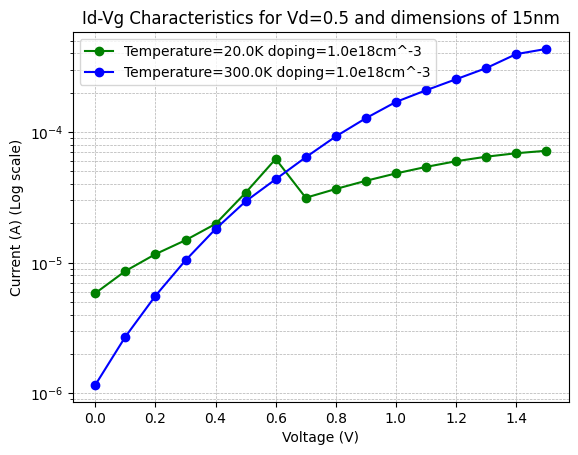

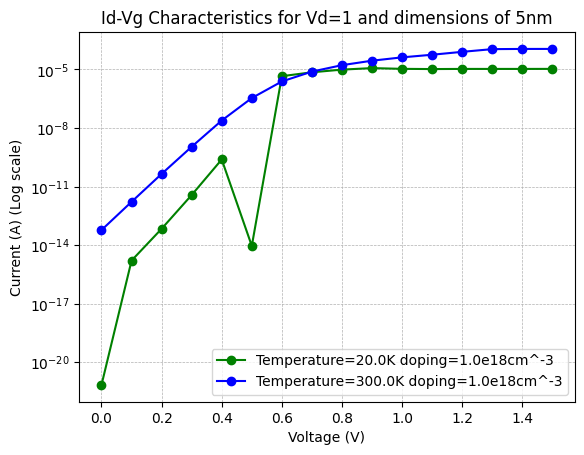

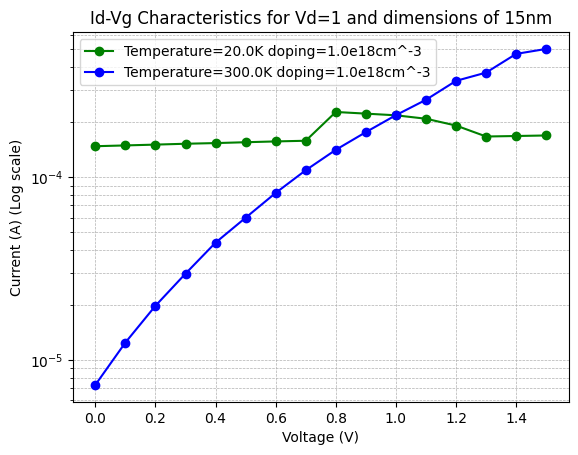

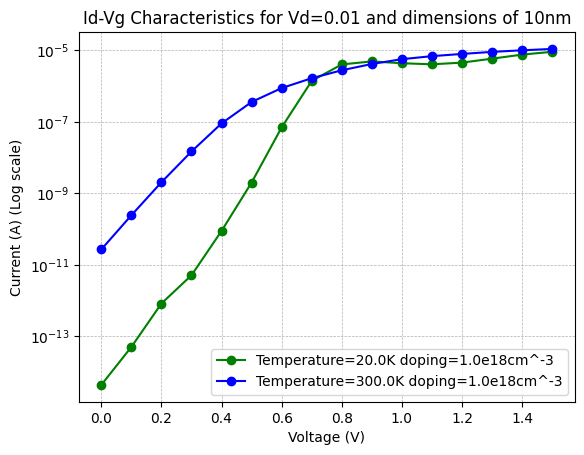

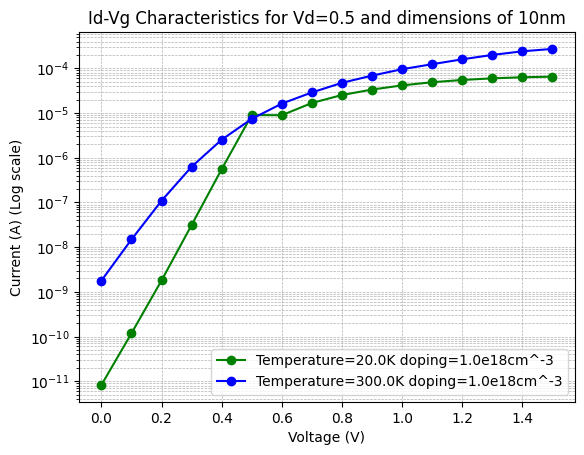

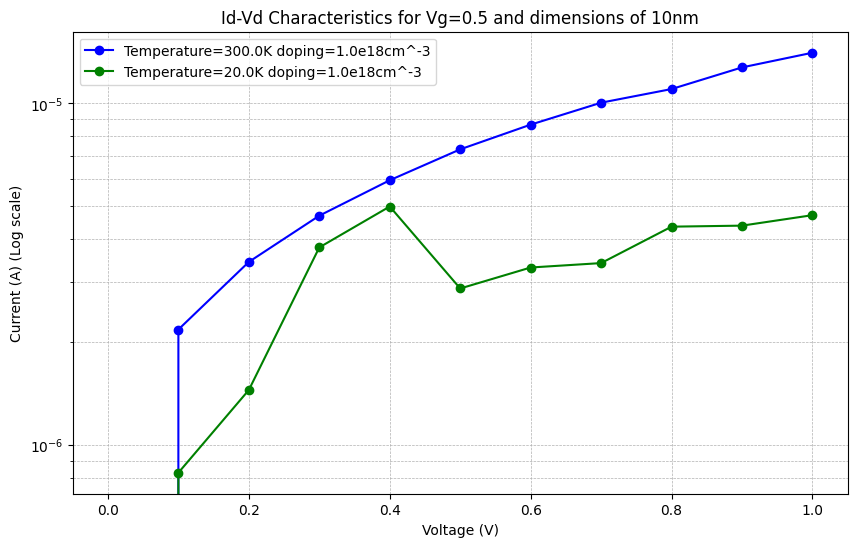

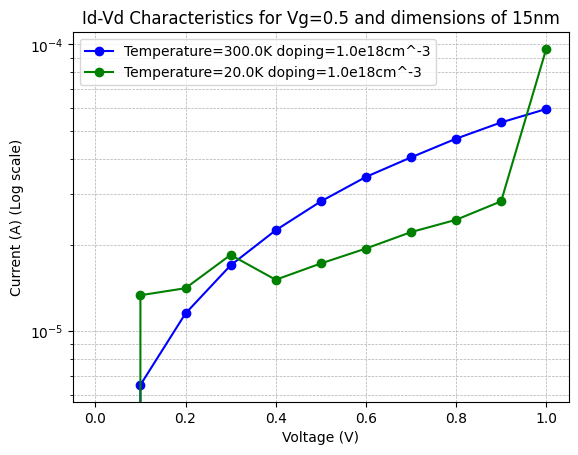

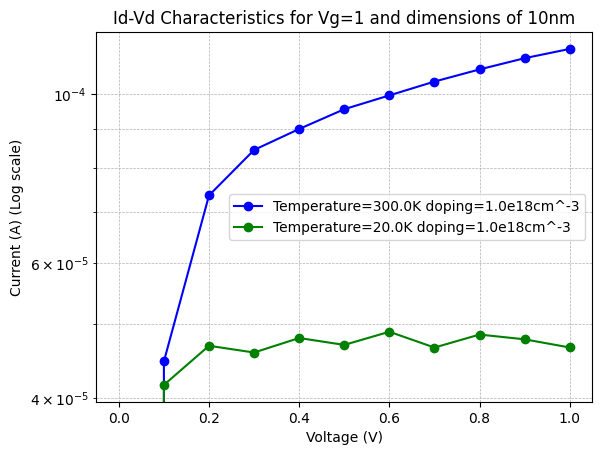

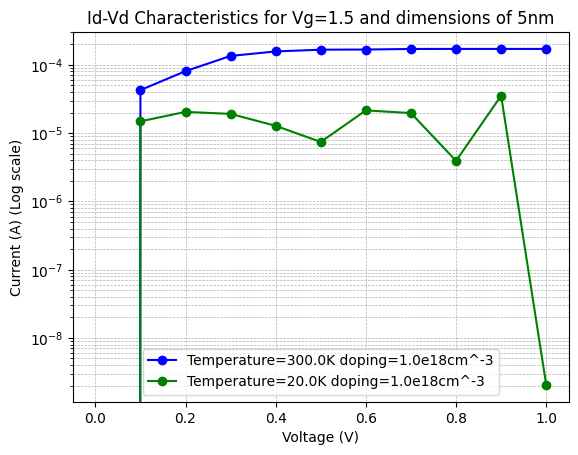

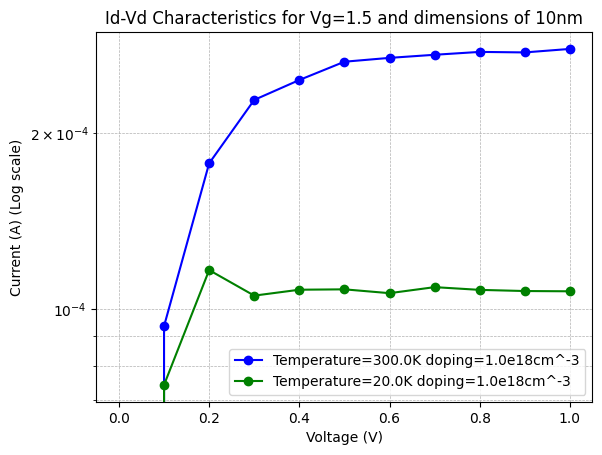

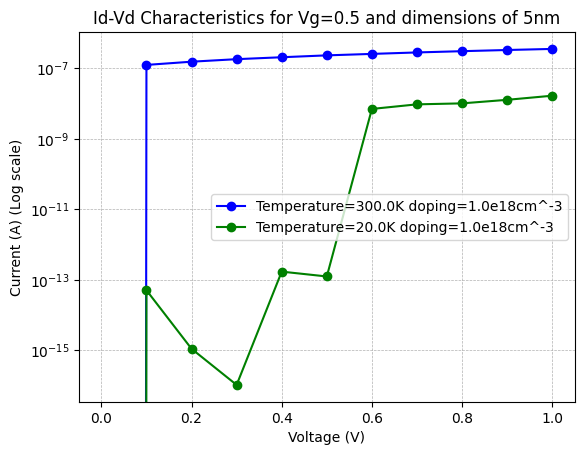

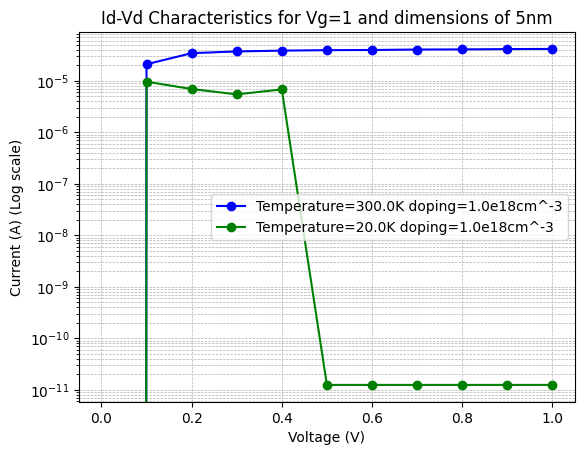

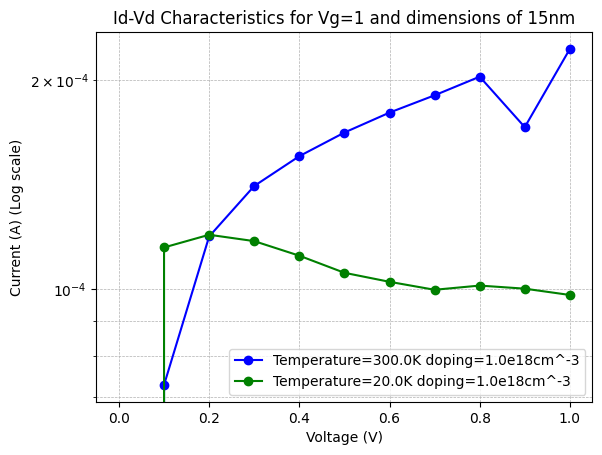

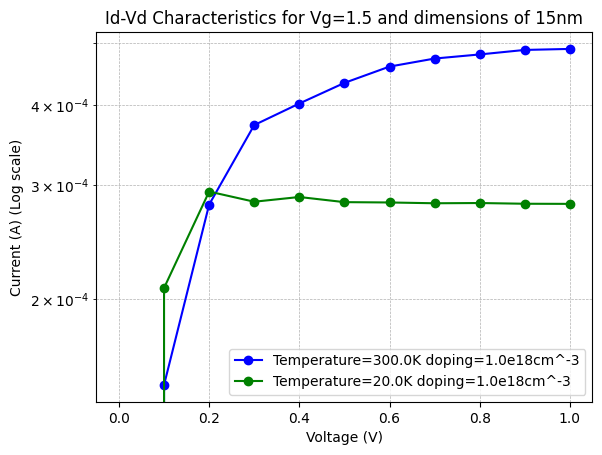

In [12]:
base_directory= "data"

match_directories_dict = match_directories(base_directory)

for (key1, key2) in match_directories_dict:
    files_dict = {}
    for dir in match_directories_dict[key1, key2]:
        temperature = dir.split("_")[1]
        data_directory = os.path.join(base_directory, dir)

        dir_parts = os.path.basename(dir).split("_")
        voltage_type = dir_parts[0]
        temperature = float(dir_parts[1].split("=")[1])
        doping = dir_parts[2].split("=")[1]

        for root, _, files in os.walk(data_directory):
            for fileName in files:
                # print(fileName)
                key = fileName
                if key not in files_dict:
                    files_dict[key] = {}

                if temperature not in files_dict[fileName]:
                    files_dict[key][temperature] = []
                # Read the data
                data = pd.read_csv(os.path.join(data_directory, fileName), skiprows=4, names=["Voltage (V)", "Current (A)"])
                data["Voltage (V)"] = pd.to_numeric(data["Voltage (V)"], errors="coerce")
                data["Current (A)"] = pd.to_numeric(data["Current (A)"], errors="coerce")

                files_dict[fileName][temperature].append(data)
                
    plot_datasets(files_dict, voltage_type, doping, log_scale=True)